In [1]:
import math

In [2]:
def calculate_entropy(charset_size: int, password_length: int) -> float:
    """
    文字の種類と文字数からパスワードのエントロピーを計算する関数。

    :param charset_size: 使用する文字の種類の総数（例: 26、52、62など）
    :param password_length: パスワードの長さ
    :return: エントロピーの値（bit単位）
    """
    if charset_size <= 0 or password_length <= 0:
        raise ValueError("文字の種類と文字数は正の値である必要があります。")

    # エントロピーを計算
    entropy = math.log2(charset_size ** password_length)
    return entropy

In [4]:
# 小文字のみの場合
charset_size = 26  # 例: 小文字のみ
password_length = 12  # パスワードの長さ
entropy = calculate_entropy(charset_size, password_length)
print(f"文字セット: {charset_size}, 長さ: {password_length}, エントロピー: {entropy:.2f} bits")

文字セット: 26, 長さ: 12, エントロピー: 56.41 bits


In [5]:
# 数字のみの場合
charset_size = 10  # 例: 数字のみ
password_length = 12  # パスワードの長さ
entropy = calculate_entropy(charset_size, password_length)
print(f"文字セット: {charset_size}, 長さ: {password_length}, エントロピー: {entropy:.2f} bits")

文字セット: 10, 長さ: 12, エントロピー: 39.86 bits


In [6]:
# 小文字と数字の場合
charset_size = 36  # 例: 小文字と数字
password_length = 12  # パスワードの長さ
entropy = calculate_entropy(charset_size, password_length)
print(f"文字セット: {charset_size}, 長さ: {password_length}, エントロピー: {entropy:.2f} bits")

文字セット: 36, 長さ: 12, エントロピー: 62.04 bits


In [7]:
# 大文字、小文字、数字の場合
charset_size = 62  # 例: 大文字、小文字、数字
password_length = 12  # パスワードの長さ
entropy = calculate_entropy(charset_size, password_length)
print(f"文字セット: {charset_size}, 長さ: {password_length}, エントロピー: {entropy:.2f} bits")

文字セット: 62, 長さ: 12, エントロピー: 71.45 bits


In [8]:
# 大文字、小文字、数字、記号の場合
charset_size = 94  # 例: 大文字、小文字、数字、記号
password_length = 12  # パスワードの長さ
entropy = calculate_entropy(charset_size, password_length)
print(f"文字セット: {charset_size}, 長さ: {password_length}, エントロピー: {entropy:.2f} bits")

文字セット: 94, 長さ: 12, エントロピー: 78.66 bits


findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
findfont: Font family 'Noto Sans CJK JP' not found.
/var/folders/lb/bgmvtswx3_9grzmg2lxvrd1h0000gn/T/ipykernel_97602/1625422785.py:44: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/lb/bgmvtswx3_9grzmg2lxvrd1h0000gn/T/ipykernel_97602/1625422785.py:44: UserWarning: Glyph 23383 (\N{CJK UNIFIED IDEOGRAPH-5B57}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/lb/bgmvtswx3_9grzmg2lxvrd1h0000gn/T/ipykernel_97602/1625422785.py:44: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layou

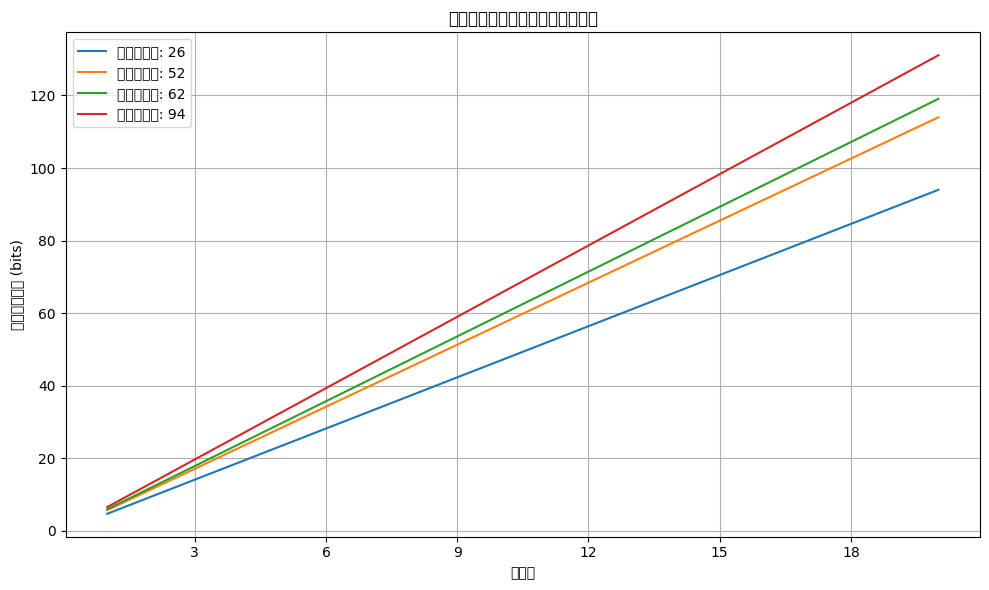

In [12]:
## エントロピーの図の作成

import math
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.ticker import MaxNLocator

# 日本語フォントの設定（例: Noto Sans CJK JP）
# rcParams['font.family'] = 'Noto Sans CJK JP'

# パスワードのエントロピーを計算する関数
def calculate_entropy_fixed(charset_size: int, password_length: int) -> float:
    if charset_size <= 0 or password_length <= 0:
        return 0
    return password_length * math.log2(charset_size)

# パラメータ設定
charset_sizes = [26, 52, 62, 94]  # 小文字, 小文字+大文字, 小文字+大文字+数字, 全文字セット
password_lengths = range(1, 21)  # パスワードの長さ: 1から20まで

# グラフデータの生成
entropy_values_fixed = {}
for charset_size in charset_sizes:
    entropy_values_fixed[charset_size] = [calculate_entropy_fixed(charset_size, length) for length in password_lengths]

# グラフの作成
plt.figure(figsize=(10, 6))

for charset_size, entropies in entropy_values_fixed.items():
    label = f"文字セット: {charset_size}"
    plt.plot(password_lengths, entropies, label=label)

# グラフの設定
plt.title("パスワードのエントロピーの増加")
plt.xlabel("文字数")
plt.ylabel("エントロピー (bits)")
plt.grid(True)
plt.legend()

# 横軸を整数のみに設定
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()


In [13]:
## パスワードが可変長の場合のエントロピー計算

import math

def calculate_entropy_range(charset_size: int, min_length: int, max_length: int) -> float:
    """
    パスワードの文字数が範囲で指定される場合のエントロピーを計算する関数。

    :param charset_size: 使用する文字セットの種類数
    :param min_length: 最小文字数
    :param max_length: 最大文字数
    :return: エントロピー (bit単位)
    """
    if charset_size <= 0 or min_length <= 0 or max_length < min_length:
        raise ValueError("入力値が不正です。")

    # 各文字数に対する組み合わせ数を合計
    total_combinations = sum(charset_size ** l for l in range(min_length, max_length + 1))

    # エントロピーを計算
    entropy = math.log2(total_combinations)
    return entropy

In [15]:
# サンプル実行
charset_size = 26  # 小文字のみ
min_length = 6
max_length = 12
entropy = calculate_entropy_range(charset_size, min_length, max_length)
print(f"文字セット: {charset_size}, 文字数範囲: {min_length}-{max_length}, エントロピー: {entropy:.2f} bits")

文字セット: 26, 文字数範囲: 6-12, エントロピー: 56.46 bits


In [16]:
import math
import math

def calculate_password_length(charset_size: int, target_entropy: float) -> int:
    """
    指定された文字セットの種類とエントロピーを基に、
    必要なパスワードの長さ（整数）を計算する関数。

    :param charset_size: 使用する文字セットの種類数（例: 26, 52, 62, 94）
    :param target_entropy: 必要なエントロピー（ビット単位）
    :return: 必要なパスワードの長さ（整数）
    """
    if charset_size <= 0:
        raise ValueError("文字セットの種類は正の値である必要があります。")
    if target_entropy <= 0:
        raise ValueError("エントロピーは正の値である必要があります。")
    
    # パスワードの長さを計算
    password_length = math.ceil(target_entropy / math.log2(charset_size))
    return password_length

In [18]:
charset_size = 62  # 小文字 + 大文字 + 数字
target_entropy = 60  # 60ビットのエントロピー
password_length = calculate_password_length(charset_size, target_entropy)
print(f"文字セット: {charset_size}, 必要エントロピー: {target_entropy} bits, 必要なパスワード長: {password_length} 文字")

文字セット: 62, 必要エントロピー: 60 bits, 必要なパスワード長: 11 文字


In [19]:
# 日本語の文字数を出力
hiragana = "".join(
    chr(i) for i in range(0x3040, 0x30A0) if "ぁ" <= chr(i) <= "ん"
)

print(f"ひらがなの文字数: {len(hiragana)}")
print(hiragana)

ひらがなの文字数: 83
ぁあぃいぅうぇえぉおかがきぎくぐけげこごさざしじすずせぜそぞただちぢっつづてでとどなにぬねのはばぱひびぴふぶぷへべぺほぼぽまみむめもゃやゅゆょよらりるれろゎわゐゑをん


In [20]:
# カタカナの文字数を出力
katakana = "".join(
    chr(i)
    for i in range(0x30A0, 0x30FF + 1)
    if "ァ" <= chr(i) <= "ン" or "ー" == chr(i)
)

print(f"カタカナの文字数: {len(katakana)}")
print(katakana)

カタカナの文字数: 84
ァアィイゥウェエォオカガキギクグケゲコゴサザシジスズセゼソゾタダチヂッツヅテデトドナニヌネノハバパヒビピフブプヘベペホボポマミムメモャヤュユョヨラリルレロヮワヰヱヲンー
